In [1]:
import numpy as np
import cv2
from skimage.io import imread
from skimage.transform import resize

import matplotlib.pyplot as plt
from glob import glob

%matplotlib inline
%load_ext autoreload
%autoreload 2


In [65]:
def visualize(images, samples_per_row=4, title=False):
    sample_rows = len(images) // samples_per_row
    fig, m_axs = plt.subplots(sample_rows, samples_per_row, figsize = (20, 6*sample_rows))
    [c_ax.axis('off') for c_ax in m_axs.flatten()]
    for ax, image in zip(m_axs.flatten(), images):
        img = imread(image)
        ax.imshow(img, cmap='gray')

def visualize_single(image, gray=True):
    if isinstance(image, str):
        print ("Reading from string")
        image = imread(image)
        
    plt.figure(figsize=(20, 10))
    if gray:
        plt.imshow(image, cmap='gray')
    else:
        plt.imshow(image)


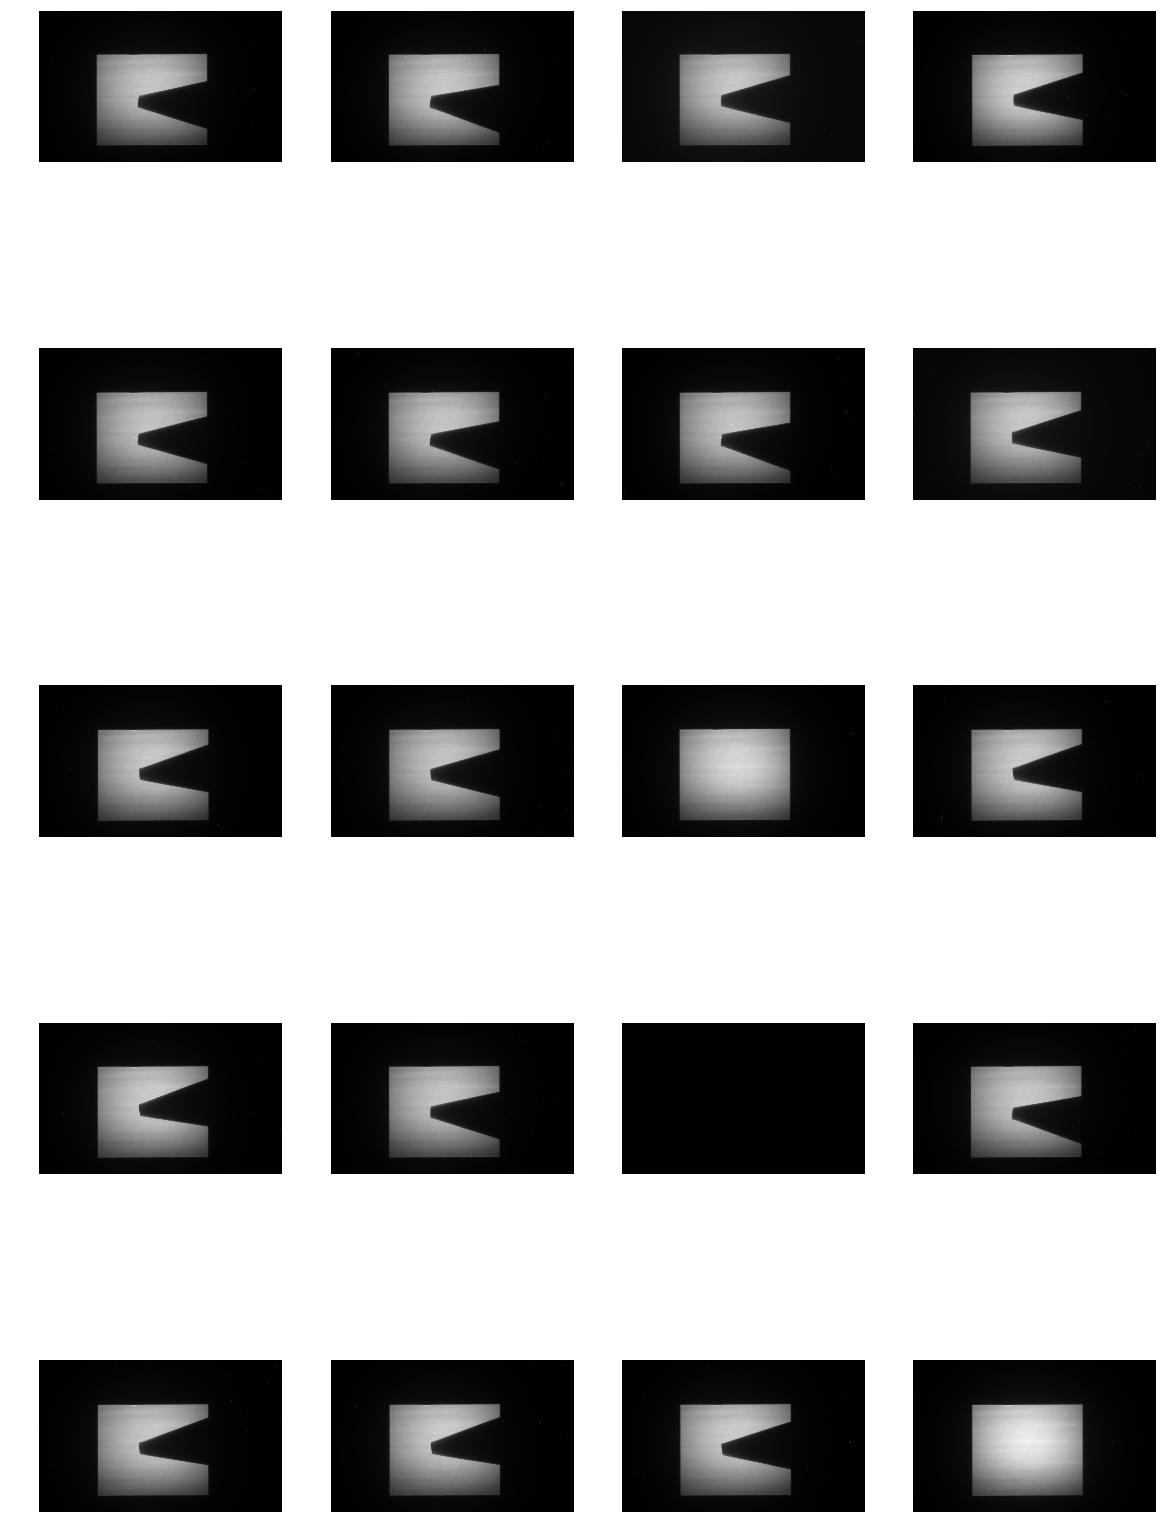

In [66]:
images = glob('./data/pin_tomo/*.tif')
visualize(images)

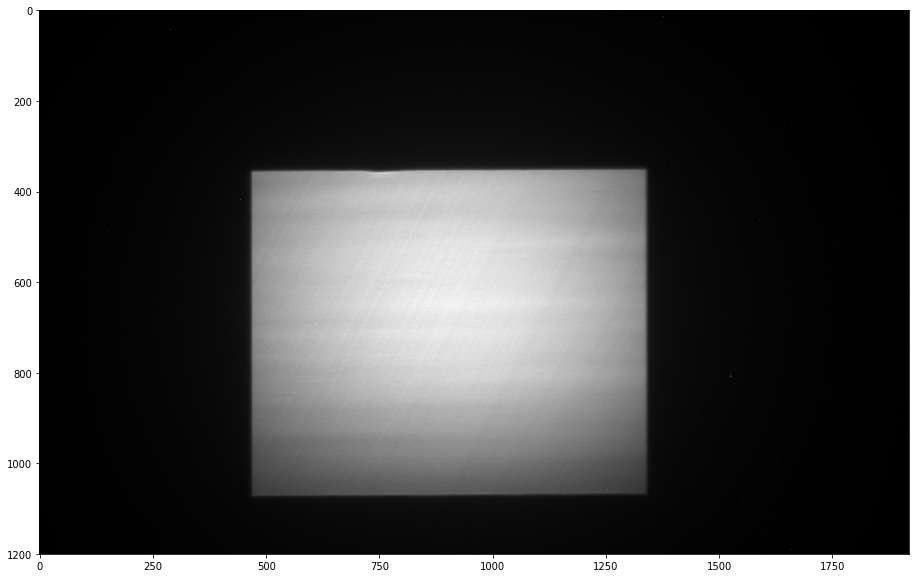

In [67]:
image = imread(images[19])
visualize_single(image)

In [84]:
image_, original = np.copy(image), np.copy(image)
image_ = (image_ - np.min(image_) ) / np.max(image_)


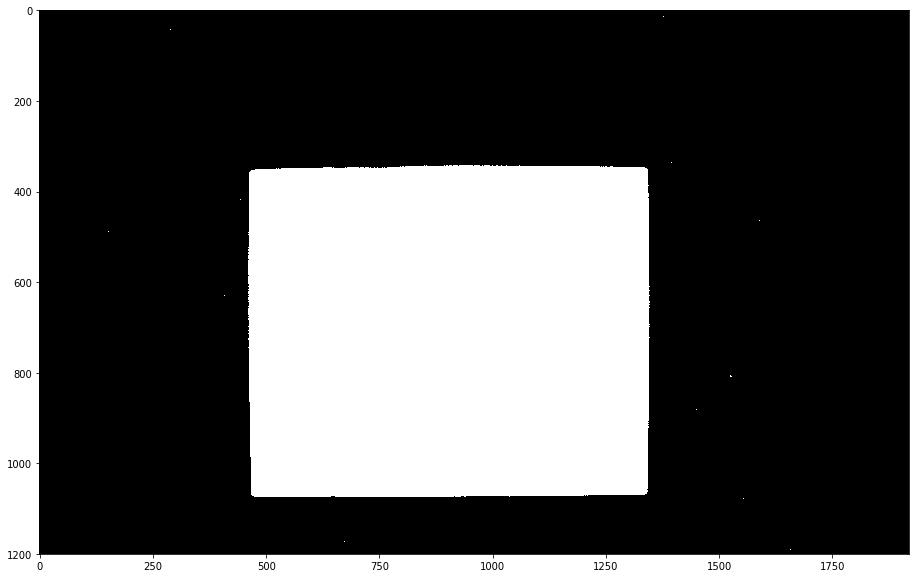

In [109]:
binary = np.zeros_like(image_)
binary[image_ > 0.1] = 1      
binary = np.uint8(binary)

edges = cv2.Canny(binary, 0.1, 0.1, apertureSize = 3)

visualize_single(binary)

/Users/faisal/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in int_scalars
  import sys


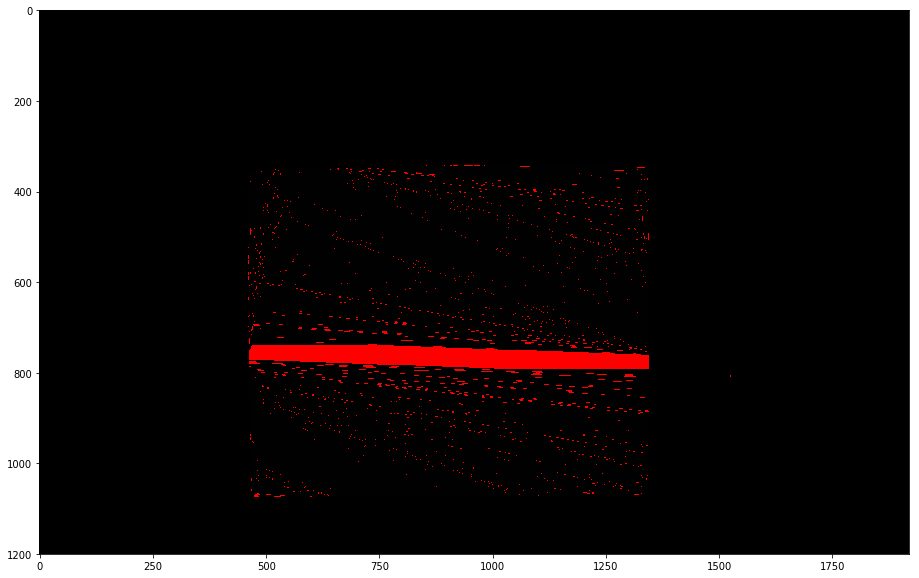

In [111]:
lines = cv2.HoughLinesP(binary, 1, np.pi/180, 5, 5, 1);
# lines = cv2.HoughLines(edges, 1, np.pi/2, 200)
lines = lines.squeeze()

output = np.dstack((binary, binary, binary))
for x0, y0, x1, y1 in lines:
    slope = (y1 - y0) / (x1 - x0)
    
    if abs(slope) == 0 or abs(slope) == float('inf'):
        cv2.line(output, (x0, y0), (x1, y1), (255,0,0), 1)

visualize_single(output, False)


In [115]:
im2, contours, hierarchy = cv2.findContours(binary, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
img = np.dstack((original.copy(), original.copy(), original.copy()))
print (countours.length)
cv2.drawContours(img, contours, -1, (0,255,0), 3)
visualize_single(img)

NameError: name 'countours' is not defined